**선형 회귀를 훈련하는 크게 두가지 방법**

- 직접 계산하는 공식으로 최적의 모델 파라미터를 해석적으로 구한다

- 경사하강법을 사용하여 모델 파라미터를 조금씩 바꾸면서 비용함수를 최소화 시킨다..
    - 배치, 미니배치, 확률적 경사하강법 등이 있다..

**다항 회귀**

- 선형 회귀보다 파라미터가 많아서 훈련 데이터에 과대적합 되기 쉽다..
- 학습곡선을 사용해서 과대적합 감지..

**분류**

- 로지스틱 회귀, 소프트맥스 회귀

#4.1 선형 회귀

- 입력 특성의 가중치 합과 편향이라는 상수를 더해서 예측을 만든다..
- 벡터 형태로 하면 더 간단히 쓸 수 있음..
    - 특성 벡터(**x**)와 모델파라미터(가중치) 벡터(**A** = (세타))를 만듦..
    - 편향에 곱해지는 x0는 항상 1로 만듦..
- $\hat{y} = XA$

**모델의 훈련**

- 오차(RMSE)를 최소화 시키는 **A**를 찾아야한다..
- 근데 MSE를 찾는거랑 똑같다..
- MSE = $((A^T)x - \hat{y})$ 의 제곱의 평균..
    - 즉, 모든 샘플에 대한 오차의 제곱을 평균한다는 말..

##4.1.1 정규방정식

- 비용 함수를 최소화 하는 A값을 찾기 위한 **해석적인 방법**

- MSE를 미분해서 0이 되는 A를 찾아라!
- $X^TXA = (X^T)(b)$를 푸는 것이다..
- (X_T)(X)가 역행렬이 있으면, 바로 A를 구할 수 있다!!
- $A = {{(X^TX)}^{-1}}(X^T)(b)$

In [3]:
#선형으로 보이는 데이터 생성
#randn : 정규분포 난수
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100,1)

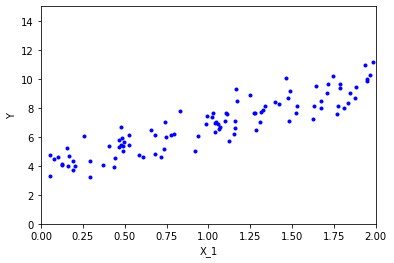

In [4]:
import matplotlib.pyplot as plt

plt.plot(X, y, "b.")
plt.axis([0 , 2 , 0 , 15])
plt.xlabel("X_1")
plt.ylabel("Y")
plt.show()

**정규 방정식**

- $A = {{(X^TX)}^{-1}}(X^T)(b)$

In [5]:
# A = 세타 : 가중치들의 벡터..
# X : 입력특성 벡터..

#모든 샘플에 x0 = 1추가..
X_b = np.c_[np.ones((100,1)), X]
#정규방정식 적용
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [6]:
theta_best

array([[3.8085144 ],
       [2.99583019]])

**설명**

- 원래 4, 3을 주었는데
- 예측이 4.3, 2.8 이다..
- 꽤 정확..

**예측**

- $\hat{y} = XA$

In [7]:
#정규방정식으로 만든 세타로 만든 예측을 그래프로 그려보자..

#처음과 끝 값을 얻고 그래프 그리겟다..
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.8085144 ],
       [9.80017478]])

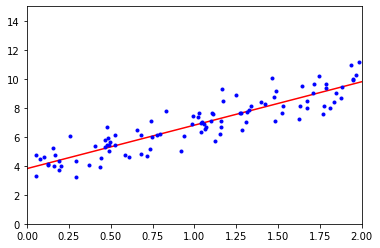

In [8]:
#모델의 예측을 그래프로..

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

**사이킷런에서 선형회귀**

In [9]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)

[3.8085144] [[2.99583019]]


In [10]:
print(lin_reg.predict(X_new))

[[3.8085144 ]
 [9.80017478]]


- scipy.linalg.lstsq()를 기반으로 하는데, 직접 호출도 가능
 - theta_best_svd : 최적의 세타 값을 저장..
 - residuals : theta_best_svd로 계산한 예측값과 실제 y값과의 제곱오차
 - rank : 무슨 행렬의 rank?
 - s : svd한 뒤의 singular value
 - rcond : s가 rcond값 보다 작으면 0으로 간주

**유사역행렬**

- 정규방정식에서 $(X^TX)^{-1}$가 존재하지 않는다면?
- 유사 역행렬 $X^{+}$를 구해서 
- 원래 예측식 $XA = \hat{y}$의 양변의 좌측에 곱해서
- $A = X^{+}\hat{y}$로 바로 구할 수도 있다..

In [11]:
theta_best_svd ,residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.8085144 ],
       [2.99583019]])

**정리**

- 보통은 정규 방정식으로 된다..
- 하지만 m < n(열이 더 많다)인 경우나 특이행렬이면 ($X^TX$)가 없으면 svd를 해서 유사 역행렬로 구해야 한다..
- 유사역행렬은 항상 구할 수 있다..

##4.1.2 계산 복잡도

**정규방정식**

- (n+1)(n+1)크기의 $X^TX$의 역행렬 계산해야함..
- O($n^2.4$) 에서 O($n^3$) 사이..

**사이킷런 LinearRegression(SVD)**

- O($n^2$)

-> 둘다 특성 수가 많아지면 매우 느려진다..

-> 샘플수에 대해서는 선형적으로 등가한다.. 

#4.2 경사 하강법

- 비용 함수를 최소화하기 위해 반복해서 파라미터를 조정해가는 것

- 파라미터 값을 무작위로 시작해서 한 스텝마다 비용함수(MSE)가 감소되는 방향으로 진행..
- 알고리즘이 최솟값에 수렴할 때까지 점진적으로 향상..
- **학습률** 파라미터
    - 스텝의 크기를 지정해줘야함..
    - 너무 크면 골짜기를 건너뛰고
    - 너무 작으면 너무 더디게 내려감..

- 비용함수의 모양에 따라 **전역최솟값**보다 덜 좋은 **지역최솟값**에 수렴할 수도 있다..
    - 다행히 선형회귀의 비용함수는 2차식으로 **볼록함수**이다
    - 특성이 많을때는 지역최솟값도 괜찮다..

- 여러 특성의 스케일이 다르다면, 스케일링 하면 더 좋은 성능을 낸다..

##4.2.1 배치 경사 하강법

- 모든 샘플에 대해서 시행한다(배치)
- 전체 훈련세트를 사용하기 때문에 훈련세트가 커지면 매우 느리다
- 최소화하는 A(세타)를 랜덤초기화하고
- 각 특성의 방향으로 편미분해서 그레디언트를 구한다..
- $
\dfrac{\partial}{\partial \boldsymbol{A}} \text{MSE}(\boldsymbol{A})
 = \dfrac{2}{m} \mathbf{X}^T (\mathbf{X} \boldsymbol{A} - \mathbf{y})
$
- 다음 스텝에서 세타를 그레디언트가 내려가는 방향으로 바꾼다..
- $
\boldsymbol{A}^{(\text{next step})} = \boldsymbol{A} - \eta \dfrac{\partial}{\partial \boldsymbol{A}} \text{MSE}(\boldsymbol{A})
$

In [12]:
eta = 0.1 #학습률
n_iterations = 100
m = 100

theta = np.random.randn(2,1) #랜덤 초기화

for iterations in range(n_iterations):
    #X_b는 x0=1을 추가한 입력 특성
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [13]:
#정규방정식으로 한것과 동일..
theta

array([[3.76830383],
       [3.02953184]])

In [14]:
#새로운 세타로 한 예측
X_new_b.dot(theta)

array([[3.76830383],
       [9.82736752]])

**학습률에 따라 10 스텝까지의 예측을 그리는 함수**

- 최적의 학습률은 그리드 탐색으로 찾음..
- 시간 단축을 위해서 반복횟수를 제한..
- 반복을 엄청 많이 해놓고 그레이디언트가 **허용오차**보다 작아지면 중지하는 방식..

In [15]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)    #100
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            if iteration > 0:
                style = "b-"
            else:   #처음 시작을 빨간줄..
                style = "r--"
            plt.plot(X_new, y_predict, style)
        
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients

        if theta_path is not None:
            #세타의 변화과정을 본다..
            theta_path.append(theta)
    plt.xlabel("X_1")
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta$ ={}".format(eta))

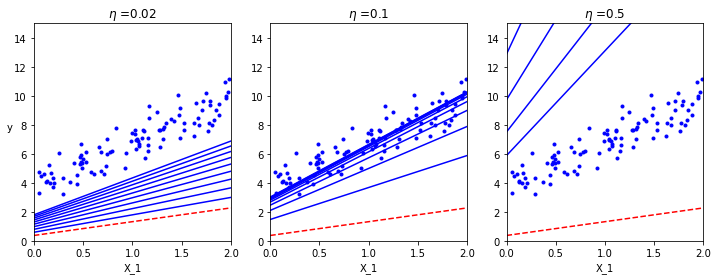

In [16]:
np.random.seed(42)
#랜덤초기화 세타 2개..
theta = np.random.rand(2,1)

plt.figure(figsize=(12,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("y", rotation=0)
plt.subplot(132); plot_gradient_descent(theta, eta = 0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta = 0.5)

plt.show()

##4.2.2 확률적 경사 하강법

- 매 스텝에서 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그레디언트를 계산한다..
    - 매 반복에서 다룰 데이터가 매우 적다.. -> 알고리즘이 훨씬 빠르고, 큰 훈련세트에도 적합..
- 확률적이기 때문에 훨씬 불안정하다..
    - 지역최솟값은 건너뛰게 해줄 수 있지만 전역 최솟값에 다다르지 못할 가능성이 높다..

-> 무작위성은 지역최솟값은 건너뛸 수 있지만 전역최솟값은 못간다.. -> 딜레마!!

**담금질 기법**

- **학습 스케쥴**
    - 매 반복에서 학습률을 결정하는 함수

- 위의 딜레마를 해결하는 방법
- 시작할 때는 학습률을 크게 하고, 점진적으로 학습률을 줄여가는 방법

**일반적으로 한 반복에서 m(샘플수)만큼 반복**

각 반복을 **에포크**라고 함


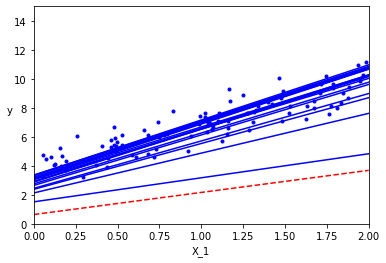

In [17]:
n_epochs = 50
t0, t1 = 5, 50  #학습 스케쥴 하이퍼파라미터
m = len(X_b)

def learning_schedule(t):
    #t가 커지면 점점 값은 줄어듦
    return t0 / (t + t1)

theta_path_sgd = []
theta = np.random.randn(2,1)        #랜덤초기화

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta)
            if i > 0:
                style = "b-"
            else:
                style = "r--"
            plt.plot(X_new, y_predict, style)
        
        random_index=np.random.randint(m)   #임의의 인덱스 잡기
        #인덱스에 맞는 원소 가져오기
        xi = X_b[random_index : random_index+1]
        yi = y[random_index : random_index+1]

        #원소에 대한 그레이디언트 구하기
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)

        #epoch*m + i가 점점 커지므로 eta는 작아진다..
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta*gradients
        theta_path_sgd.append(theta)

plt.plot(X, y, "b.")
plt.xlabel("X_1")
plt.ylabel("y", rotation=0)
plt.axis([0, 2, 0, 15])
plt.show()

In [18]:
#훨씬 좋은 세타값..
theta

array([[3.82907261],
       [3.02568639]])

**사이킷런의 SGDRegressor의 방식**

- 샘플이 무작위로 선택되기 때문에 한 에포크에서 같은 샘플이 여러번 선택될 수 있다
- 에포크마다 모든 샘플을 사용하게 하려면 훈련 세트를 섞고 하나씩 사용하게 하고
- 다음 에포크에서 다시 섞는 식의 방법을 사용한다

**학습 스케쥴**

- invscaling(기본), constant, optimal, adaptive..
- t : 반복횟수
- eta0, power_t : 우리가 지정가능, 기본값 각각 0.01, 0.25
- 기본값일 때, $\eta^{t} = eta0 / t^{power_t}$

In [19]:
#학습 스케쥴은 기본값이 'invscaling'이다..

from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)

#ravel() : numpy 함수, 다차원 배열을 1차원 배열로 바꿔줌
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [20]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.80934018]), array([3.02247491]))

##4.2.3 미니배치 경사 하강법

**미니배치 경사하강법**

- 미니배치 : 임의의 작은 샘플 세트
- 미니배치에 대한 그레디언트를 계산함
- 장점 : GPU를 사용해서 얻는 성능 향상..
- 배치와 확률적 그 사이 중간단계..
    - 미니배치 크기를 크게하면 배치와 비슷해지고
    - 미니배치 크기를 작게하면 확률적과 비슷해진다..


**아래의 코드는 에포크마다 샘플을 섞는 과정이 포함되어 있다**

In [21]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # 랜덤 초기화

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):           #에포크 시작
    #permutation으로 인덱스 섞고
    shuffled_indices = np.random.permutation(m)
    #섞은 인덱스로 X_b와 y를 섞는다
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]     #미니배치 갯수만큼 사용한다
        yi = y_shuffled[i:i+minibatch_size]       #얘도 그렇다

        #그레이디언트 구하기
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)

        eta = learning_schedule(t)
        theta = theta - eta * gradients       #경사하강법 시행
        theta_path_mgd.append(theta)          #path 그릴려고 추가한다

      #중복을 허용하지 않는 샘플링을 사용한다

In [22]:
theta

array([[3.77177061],
       [2.93119127]])

**세가지 방법을 시행할 때 각각 theta의 변화를 보자**

In [23]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

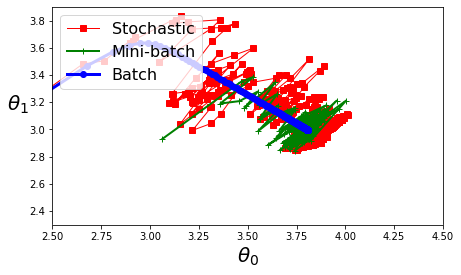

In [24]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
#각 방법들의 세타를 쭉 이어본다
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])   #x축 : 2.5~4.5   y축 : 2.3~3.9
plt.show()

**분석**

- 모두 최솟값 근처에 도달했다
- 배치 경사는 오랜시간이 걸리지만 실제로 최솟값에서 멈춘다
- 확률적과 미니배치는 근처에서 맴돈다.. 하지만 적절한 학습 스케쥴을 이용하면 최솟값에 도달한다!

#4.3 다항 회귀

- 특성이 여러개..
- **다항 회귀** : 비선형 데이터셋에 선형 모델을 훈련시키는 것

In [25]:
#2차방정식으로 비선형 데이터를 생성

m = 100
X = 6 * np.random.rand(m,1) -3        # -3 ~ 3의 난수
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

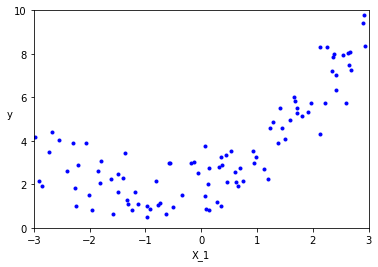

In [26]:
plt.plot(X, y, "b.")
plt.axis([-3,3,0,10])
plt.xlabel("X_1")
plt.ylabel("y",rotation=0)
plt.show()

**PolynomialFeatures**

- 각 특성을 서로 곱해서 새로운 특성으로 추가해줌..
- 서로 곱하기 때문에 시행하면 특성 수가 엄청나게 늘어날 수 있다!! (n 팩토리얼 개)

In [27]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [28]:
X[0], X_poly[0]

(array([2.38942838]), array([2.38942838, 5.709368  ]))

In [29]:
#이제 적용해보자..
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

#꽤 적확.. 원래 정답 : 2, 1, 0.5

(array([1.9735233]), array([[0.95038538, 0.52577032]]))

**구한 값으로 그래프 그리기**

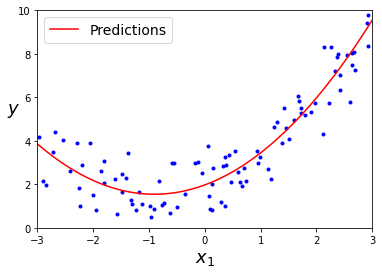

In [30]:
#범위 전체를 예측..
X_new=np.linspace(-3, 3, 100).reshape(100,1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X, y, "b.")

#예측의 그래프
plt.plot(X_new, y_new, "r-", label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

#4.4 학습 곡선

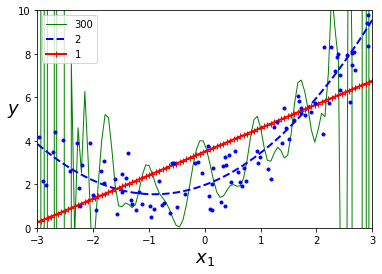

In [31]:
# 300차, 2차, 1차 선형회귀를 파이프라인을 이용해서 훈련시키는 코드..
#특성이 매우 많으면 복잡한 모델이 나오고, 이 모델은 과대적합되는 경우가 많다

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()

    #특성을 늘려주고 표준화를 한뒤 예측하는 걸 합친 파이프라인..
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    
    polynomial_regression.fit(X, y)
    #예측.. X_new는 -3에서 3까지를 linespace 한것..
    y_newbig = polynomial_regression.predict(X_new)
    #그래프 그리기..
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

- **학습 곡선** : 과대적합과 과소적합 여부를 확인하는 방법!!
- 과대적합
    - 훈련세트에서 성능 good
    - 검증세트에서 성능 bad
- 과소적합
    - 훈련, 검증세트에서 모두 성능 bad


**학습 곡선** 생성

- 훈련세트와 검증세트의 성능을 반복적으로 확인한다..
- 훈련세트의 크기를 1에서부터 점점 늘려가면서 훈련시키고
- 오차를 확인하는 방식..

In [32]:
# 비선형 데이터에 대한 단순 선형 회귀..(직선..)

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curve(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []   #그래프를 위한 리스트

    for m in range(1, len(X_train)):
        #훈련세트 크기를 늘려가면서 훈련..
        model.fit(X_train[:m], y_train[:m])
        #훈련/ 검증 데이터에 대한 예측을 만듬..
        y_train_pred = model.predict(X_train[:m])
        y_val_pred = model.predict(X_val)

        #오차를 리스트에 추가..
        train_errors.append(mean_squared_error(y_train[:m], y_train_pred))
        val_errors.append(mean_squared_error(y_val, y_val_pred))
    
    #RMSE를 그리자..
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="Train_set")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Val_set")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)

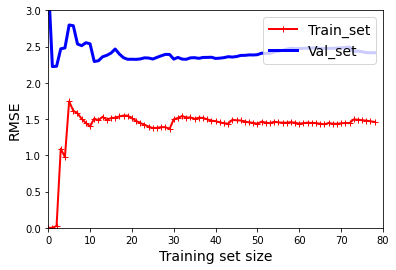

In [33]:
lin_reg = LinearRegression()
plot_learning_curve(lin_reg, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

**분석**

- 훈련세트 점수
    - 훈련세트 크기가 작을때는 완벽한 학습이 가능했다..
    - 점점 늘어남에 따라 다 맞출 수가 없어서 오차가 점점 증가하고, 일정 크기가 되면 오차가 일정해진다..

- 검증세트 점수
    - 훈련세트 크기가 작을때는 제대로 일반화가 안 돼서 오차가 매우 크다..
    - 점점 늘어남에 따라 오차가 줄어들고, 어느정도 훈련세트의 오차 그래프와 가까워진다..

- 전형적인 과소적합의 학습 곡선..
    - 꽤 높은 오차에서 매우 가까이 두 곡선이 근접해 있다..

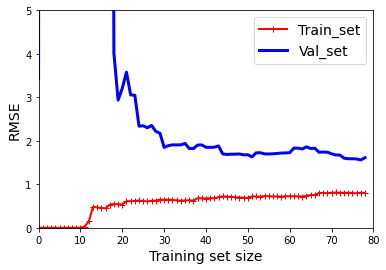

In [34]:
# 2차 비선형 데이터에 대한 10차 다항회귀..

from sklearn.pipeline import Pipeline

# 10차로 특성을 늘리고 선형회귀 모델로 예측하는 파이프라인..
polynomial_regression = Pipeline([
            ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
            ("lin_reg", LinearRegression()),
])

plot_learning_curve(polynomial_regression, X, y)
plt.axis([0, 80, 0, 5])
plt.show()

**분석**

- 훈련 데이터의 오차가 위의 선형 회귀 모델보다 훨씬 낮다.
- 두 곡선 사이의 공간이 크다..
- 전형적인 과대적합 모델의 학습 곡선이다..

**정리**

- 훈련세트를 점차적으로 늘려가면서 모델을 훈련시키고, 그 때마다의 훈련세트와 검증세트의 오차를 그래프로 그린 곡선

- 과대적합의 곡선
    - 훈련세트의 오차가 매우 작다
    - 두 곡선 사이의 공간이 크다
    - 훈련세트가 더 커지면 개선될 수 있다..

- 과소적합의 곡선
    - 두 곡선 모두 비교적 높이 있다
    - 두 곡선 사이의 공간이 좁다..

**편향/분산 트레이드오프**

- 편향
    - 잘못된 가정으로 인한 것 (ex_데이터가 실제로 2차인데 선형으로 가정하는 오류..)
    - 과소적합되기 쉬움..
- 분산
    - 훈련 데이터의 작은 변동에 모델이 과도하게 민감하기 때문에 나타남..
    - 자유도가 높은 모델(고차 다항 회귀)이 높은 분산을 가지기 쉽다..
    - 과대적합되기 쉬움..

- 관계

    - 모델 복잡도 up => 분산 up, 편향 down
    - 모델 복잡도 down => 분산 down, 편향 up

#4.5 규제가 있는 선형 모델

과대적합을 감소시키는 좋은 방법

- 모델을 규제하는 것
- 규제가 있는 모델 대부분은 스케일에 민감..
- 다항회귀 : 다항식의 차수를 감소..
- 선형회귀 : 모델의 가중치 제한
    - 각기 다른 방법으로 가중치를 제한하는 릿지, 라쏘, 엘라스틱넷



- 규제항은 훈련하는 동안만..
- 훈련이 끝나면 모델 성능은 규제가 없는 성능지표로 평가함..

##4.5.1 릿지 회귀

**규제항**

 - 가중치 벡터의 $l_2$노름의 제곱을 2로 나눈 것

**릿지 회귀의 비용 함수**

- $
J(\boldsymbol{A}) = \text{MSE}(\boldsymbol{A}) + \alpha \dfrac{1}{2}\sum\limits_{i=1}^{n}{A_i}^2 = (1) + (2)
$
- $\alpha$ : 얼마나 규제할지 조절하는 하이퍼파라미터
    - $\alpha$가 작으면 J(A)의 (2)의 의미가 없어짐.. -> (1)에서 알아서 최소 A값을 구한다..
    - $\alpha$가 크면 J(A)의 (2)가 엄청나게 커진다.. -> (1)이 의미가 없어지고, (1)에서 추정치 A는 0에 가까워진다..

- **특성의 가중치를 0으로 만들지는 않는다!!**

In [35]:
#Not Shown in Book
#데이터 만들기

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
# y = 0.5x + 1
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5

#나중에 그래프를 그리기위한 X축..
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [36]:
#정규방정식을 사용한 릿지회귀
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [37]:
ridge_reg.coef_, ridge_reg.intercept_

(array([[0.36280369]]), array([1.00650911]))

In [38]:
#확률적 경사하강법을 사용한 릿지회귀..
#penalty 매개변수를 "l2"로 두면 같다..
#SGD가 비용함수에 가중치 벡터의 l2노름의 제곱을 2로 나눈 규제항을 추가하게 만듦

sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.46543286])

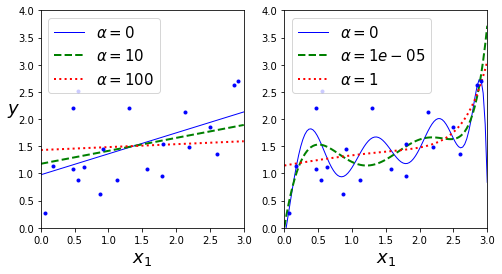

In [39]:
#now shown in book
#alpha 값에 따른 모델 비교..

from sklearn.linear_model import Ridge

def plot_model(model_class, polynomial, alphas, **model_kargs):
    #알파에 따른 색상 지정
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        #알파가 0이면 선형회귀..
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:  #고차 다항회귀면 특성을 10차로 늘리고 스케일링 후 예측하는 파이프라인 생성
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y) #훈련
        y_new_regul = model.predict(X_new)  #예측
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    #훈련 데이터 그려주기
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
#선형회귀 릿지모델 (규제 : 0, 10, 100)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
#다항회귀 릿지모델 (규제 : 0, 10**-5, 1)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

plt.show()

##4.5.2 라쏘 회귀

**규제항**

- 가중치 벡터의 $l_1$ 노름

**라쏘 회귀의 비용 함수**

- $
J(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta}) + \alpha \sum\limits_{i=1}^{n}\left| \theta_i \right| = (1) + (2)
$
- **덜 중요한 특성의 가중치를 0으로 만든다!!**
- 자동으로 특성 선택을 하고 **희소 모델**을 만들어 버린다
    - 즉, 0이 아닌 특성의 가중치가 적다

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.802867703827423, tolerance: 0.0009294783355207351
  positive)


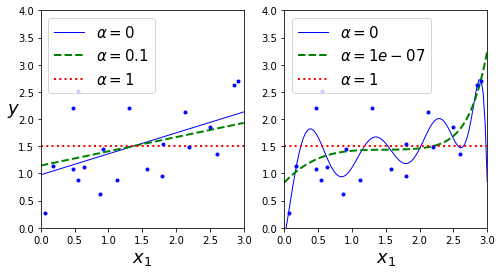

In [40]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

plt.show()

**분석**

- $\alpha = 10^{-7}$일 때는 거의 선형적이다..
- 차수가 높은 다항 특성의 가중치가 0이 되었다는 말이다..

In [41]:
#확인..alpha = 1일 때 coef랑 intercept확인..
 
Lasso_check = Lasso(alpha = 1)
Lasso_check_1 = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", Lasso_check),
                ])
Lasso_check_1.fit(X,y)
Lasso_check.coef_, Lasso_check.intercept_

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([1.50467735]))

- 라쏘의 비용함수는 가중치가 0일 때 미분불가능..
- 가중치가 0이 되었을 때 **서브그레이디언트 벡터**를 사용하면 된다..
    - 가중치의 양, 음, 0인지를 확인해서 sign을 알려주는 벡터..
    - 책 p.190 확인..

In [42]:
# Lasso 클래스를 사용..
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

In [43]:
# 확률적 경사하강법을 사용..
# penalty = "l1"

sgd_lasso_reg = SGDRegressor(penalty="l1")
sgd_lasso_reg.fit(X, y.ravel())
sgd_lasso_reg.predict([[1.5]])

array([1.46819507])

##4.5.3 엘라스틱넷

- 릿지와 라쏘를 절충한 모델..

**규제항**

- 릿시와 회귀의 규제를 더한 것
- 혼합 비율 r을 사용해서 더한다
- r = 1이면 라쏘회귀와 같고, r = 0이면 릿지회귀와 비슷하다(계수가 1/2 임..)

**엘라스틱넷의 비용 함수**

- $
J(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta}) + r \alpha \sum\limits_{i=1}^{n}\left| \theta_i \right| + \dfrac{1 - r}{2} \alpha \sum\limits_{i=1}^{n}{{\theta_i}^2}
$

In [44]:
#l1_ratio 매개변수로 혼합 비율 r을 지정..

from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

###규제가 있는 모델 정리

- 대부분의 경우에 규제가 약간 있는 것이 좋다

- 릿지가 기본이 된다..

- 특성이 몇 개뿐이라고 의심되면 라쏘, 엘라스틱넷 시행..
    - 둘다 특성의 가중치를 0으로 만들 수 있다
    - 라쏘는 최대 샘플 수 만큼의 특성을 선택함
    - 특성 수가 훈련샘플 수보다 많거나 특성 몇 개가 강하게 연관되어 있을 때는 엘라스틱넷 선호..
    

##4.5.4 조기 종료

- 검증 에러가 최솟값에 도달하면 훈련을 중지시키는 방식

In [45]:
#다시 앞의 다항회귀 데이터 생성..

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

# 훈련세트 검증세트 준비
X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

**조기종료를 구현하는 기본코드**

- 훈련을 1회씩 해나가면서 훈련/검증세트 점수 확인..
- 검증세트 점수가 작아졌다면 그 때의 파라미터를 저장

In [46]:
from copy import deepcopy

#90차까지 특성을 늘리고 스케일링하는 파이프라인
poly_scaler = Pipeline([
            ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
            ("std_scaler", StandardScaler())
    ])

#훈련검증세트 준비
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

#1번 시행, 학습률은 eta0라는 상수로 고정
#warm_state=True하면 중지된 곳에서 다시 시작함
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    # 훈련을 이어서 진행
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    #최소 검증오차보다 검증오차가 작으면 값 저장..
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

**그래프 그리기**

- 그래프에 주석달기
    - [plt.annotate](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html)

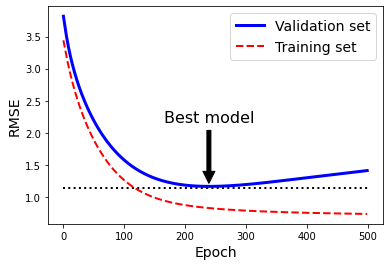

In [56]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

#500에포크까지 진행하면서 훈련RMSE랑 검증RMSE를 다 저장하고 그린다..
n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

#검증에러가 최저일 때가 최고의 epoch다
best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

#Best model일 때를 주석으로 표시..
plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),    #어느 점이 포인트인지
             xytext=(best_epoch, best_val_rmse + 1),    #주석을 어디 표시할지
             ha="center",   #주석의 정렬
             arrowprops=dict(facecolor='black', shrink=0.05),   #?화살표 잭깔?
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better

#최저 검증RMSE를 표시하는 점선..
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
#기본 X축.. 0~500
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)

plt.show()

In [57]:
best_epoch

239

In [58]:
best_model

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
             learning_rate='constant', loss='squared_loss', max_iter=1,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
             shuffle=True, tol=-inf, validation_fraction=0.1, verbose=0,
             warm_start=True)

#4.6 로지스틱 회귀

- 2진 분류기..

##4.6.1 확률 추정

**작동 방식**

- 입력 특성의 가중치 합에 편향을 더함
- 그 결과값의 **로지스틱(시그모이드)**을 출력한다..
- 통과한 값이 0.5 이상이면 1(양성)로 예측..
- 통과한 값이 0.5 미만이면 0(음성)으로 예측..

**시그모이드 함수**

- **$\sigma(t) = \frac{1}{1 + e^{-t}}$**

**예측 결과값**

- 샘플이 많으면 가중치합이 XA이다..
- $\hat{y} = \sigma(XA)$

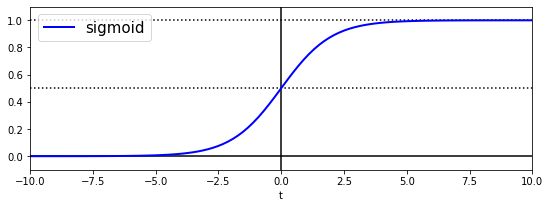

In [62]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9,3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot(t, sig, "b-", linewidth=2, label="sigmoid")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=15)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

##4.6.2 훈련과 비용 함수

**하나의 훈련 샘플에 대한 비용 함수**

- $
c(\boldsymbol{\theta}) =
\begin{cases}
  -\log(\hat{p}) & \text{if } y = 1, \\
  -\log(1 - \hat{p}) & \text{if } y = 0.
\end{cases}
$

[]

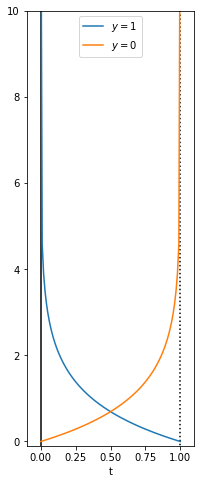

In [71]:
#손실함수 정의
t = np.linspace(0.000001, 0.999999, 100)
loss_1 = -np.log(t)
loss_2 = -np.log(1 - t)

#그래프 그리기
plt.figure(figsize=(3,8))
plt.plot([0,0], [-10, 10], "k-")
plt.plot([1,1], [-10,10], "k:")
plt.plot(t, loss_1, label="$y=1$")
plt.plot(t, loss_2, label="$y=0$")
plt.legend(loc="upper center")
plt.xlabel("t")
plt.axis([-0.1, 1.1, -0.1, 10])
plt.plot()

**로지스틱 회귀 비용 함수(로그 손실)**


- $
J(\boldsymbol{\theta}) = -\dfrac{1}{m} \sum\limits_{i=1}^{m}{\left[ y^{(i)} log\left(\hat{p}^{(i)}\right) + (1 - y^{(i)}) log\left(1 - \hat{p}^{(i)}\right)\right]}
$

- 위의 두 경우를 합친 것..

- $y^{i} = 1$이면 앞에 것만 남고, $y^{i} = 0$이면 뒤에 것만 남는다..

- 최솟값을 계산하는 공식(정규방정식)같은 것이 없지만, 볼록함수이다..

- 볼록함수이므로 경사하강법이 전역 최솟값을 찾는 것을 보장한다..

**로지스틱 비용 함수의 편도 함수**

- $
\dfrac{\partial}{\partial \theta_j} \text{J}(\boldsymbol{\theta}) = \dfrac{1}{m}\sum\limits_{i=1}^{m}\left(\mathbf{\sigma(\boldsymbol{\theta}}^T \mathbf{x}^{(i)}) - y^{(i)}\right)\, x_j^{(i)}
$
- 특성 $\theta_j$의 방향으로의 그레이디언트 벡터 사용

##4.6.3 결정 경계

- 붓꽃 데이터셋을 사용
- 3개의 품종 중에서 Iris-Virginica를 감지하는 분류기를 만들자..

In [72]:
from sklearn import datasets
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [73]:
X = iris["data"][:, 3:]     #꽃잎의 너비를 가져옴
y = (iris["target"] == 2).astype(np.int)    #Iris-Virginica이면 1, 아님 0

In [74]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

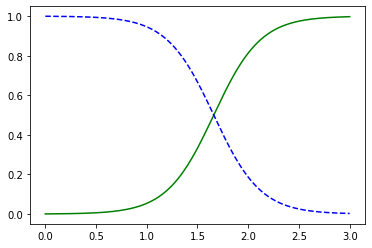

In [76]:
# 꽃잎의 너비가 0 ~ 3인 꽃에 대해 모델의 추정 확률을 그려보자..
X_new = np.linspace(0, 3, 1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")
plt.show()

책 그림..

/usr/local/lib/python3.7/dist-packages/matplotlib/patches.py:1327: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  verts = np.dot(coords, M) + (x + dx, y + dy)


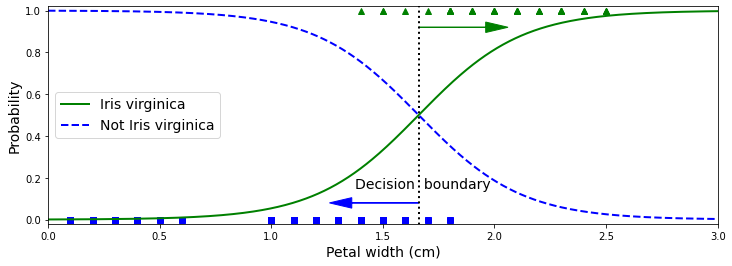

In [80]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

#양성일 확률이 0.5이상인 X_new에서 제일 첫번째 원소..
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(12, 4))

#앞의 데이터 중에서 y=0인 거랑 y=1인거를 각각 그림..
plt.plot(X[y==0], y[y==0], "bs")    
plt.plot(X[y==1], y[y==1], "g^")

# 결정경계선 그리기..
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
# 확률 선 그리기..
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")

plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
# (decision_boundary, 0.08)에서 시작, (-0.3, 0)방향으로 화살표를 그림
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
# (decision_boundary, 0.92)에서 시작, (0.3, 0)방향으로 화살표..
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])

plt.show()

**분석**

- 양성 : 약 1.4 ~ 2.5cm
- 음성 : 약 0.1 ~ 1.8cm
- 두 구간이 중첩되는 1.6 근방에서는 고만고만하다.. 
- predict_proba() 해서 높은 클래스를 반환..
- 양쪽의 확률이 50%로 똑같은 1.6쪽에서 **결정 경계**가 만들어진다..

In [81]:
#결정경계 1.6 정도 인증..

log_reg.predict([[1.7], [1.5]])

array([1, 0])

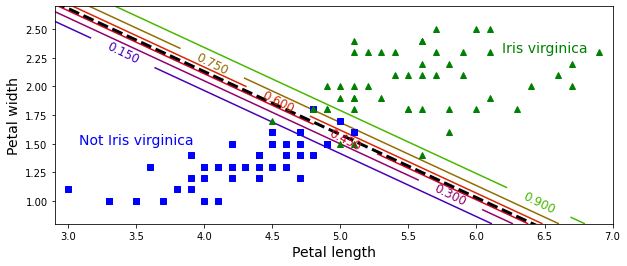

In [84]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

# 매개변수 C : alpha의 역수, 클수록 규제는 약함
log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

#격자를 생성
x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])

plt.show()

**분석**

- 점선 : 모델이 50% 확률을 추정하는 지점.. -> 결정경계
- 각 실선 : 모델이 각 확률로 추정하는 기준
    - 위에 있으면 각 확률로 양성(Iris-virginica로 판단..)

- 경계는 방정식 $A_0 + A_1x_1 + A_2x_2 = 0$을 만족하는 포인트 **x**의 집합이다..
    - 선형 방정식이므로 직선!!

##4.6.4 소프트맥스 회귀

- LogisticRegression모델은 다중클래스를 직접 지원함..
- 이를 **소프트맥스 회귀**라고 함

**계산 과정**

- 샘플에 대해 각 클래스 k에 대한 점수를 클래스별로 계산한다
- 그 결과를 소프트맥스 함수에 통과시킨다..
- 가장 점수가 높은 클래스로 예측한다..

**각 클래스 k에 대한 소프트맥스 점수**

- $s_k(\mathbf{x}) = (A^{(k)})^{T}\mathbf{x}$

- 각 클래스는 자신만의 파라미터 벡터 $A^{k}$가 있다
- 이 벡터들은 **파라미터 행렬**에 행으로 저장된다..

**소프트맥스 함수**

- 위의 점수를 소프트맥스 함수에 넣어서 최종 결과를 낸다
- $
\hat{p}_k = \sigma\left(\mathbf{s}(\mathbf{x})\right)_k = \dfrac{\exp\left(s_k(\mathbf{x})\right)}{\sum\limits_{j=1}^{K}{\exp\left(s_j(\mathbf{x})\right)}}
$
- 모든 클래스일 확률을 더하면 1이 된다

**소프트맥스 회귀 분류기의 예측**

- 위의 통과시킨 값이 가장 큰 클래스로 예측한다
- $\hat{y} = $argmax_k($\sigma\left(\mathbf{s}(\mathbf{x})\right)_k)
$

**소프트맥스 회귀의 손실함수**

- **크로스 엔트로피** 비용함수
- $
J(\boldsymbol{\Theta}) = - \dfrac{1}{m}\sum\limits_{i=1}^{m}\sum\limits_{k=1}^{K}{y_k^{(i)}\log\left(\hat{p}_k^{(i)}\right)}
$
- K=2일 때 로지스틱과 같다

**클래스 k에 대한 크로스 엔트로피의 그레이디언트 벡터**

- 
$
\nabla_{\boldsymbol{\theta}^{(k)}} \, J(\boldsymbol{\Theta}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{ \left ( \hat{p}^{(i)}_k - y_k^{(i)} \right ) \mathbf{x}^{(i)}}
$

In [85]:
X = iris["data"][:, (2,3)]  #꽃잎 길이, 꽃잎 너비
y = iris["target"]

#multi_class, solver매개변수를 아래와 같이 지정해야 소프트맥스 회귀 가능
#기본적으로 레이블이 여러개면 일대다(OvA)전략 사용
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [86]:
softmax_reg.predict([[5, 2]])   #꽃잎의 길이가 5, 너비가 2인 붓꽃 예측..

array([2])

In [87]:
#94.2%의 확률로 Iris-Virginica, 5.8%의 확률로 Iris-Versicolor 예측..

softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

**결정 경계 그래프**

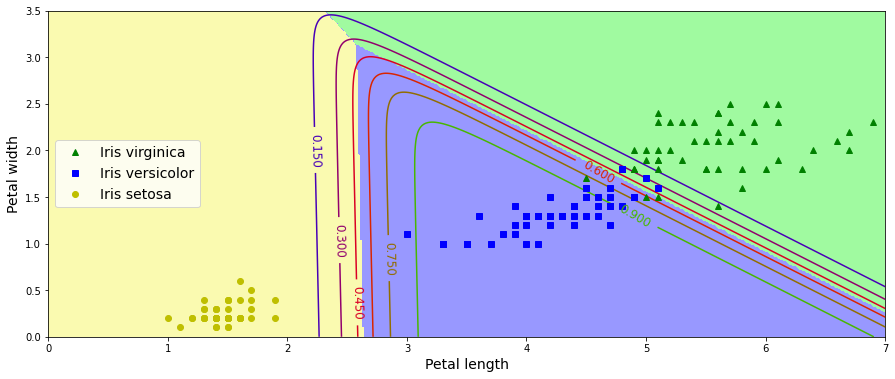

In [89]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(15, 6))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])

plt.show()

**분석**

- 클래스의 결정경계는 모두 선형이다..
- Iris-Versicolor클래스에 대한 확률을 곡선으로 나타냈다..
- 모든 결정경계가 만나는 지점은 확률 33%..

#4.7 연습문제